In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [12]:
df=pd.read_csv('/content/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
438,LP002403,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban,N


In [14]:
df.shape

(614, 13)

In [16]:
df=df.drop(columns=['Loan_ID'],axis=1)

In [17]:
df.shape

(614, 12)

In [18]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [22]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

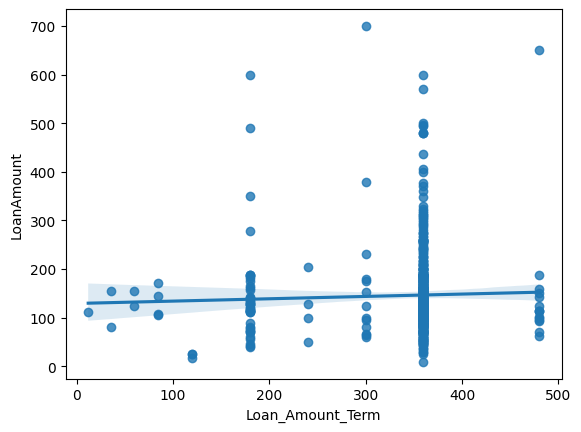

In [64]:
sns.regplot(x='Loan_Amount_Term',y='LoanAmount',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

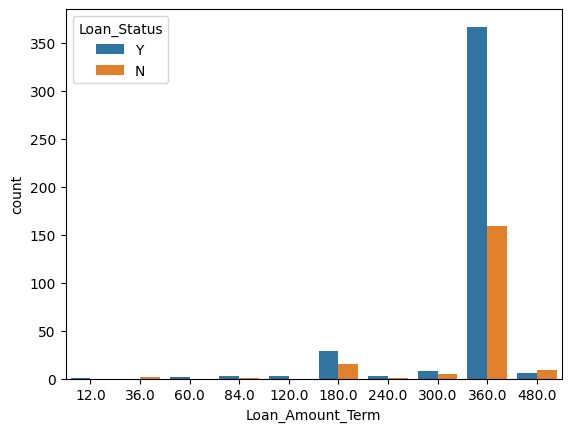

In [61]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

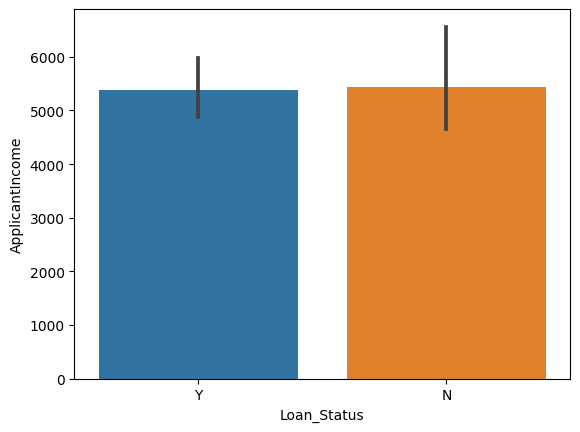

In [44]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='count'>

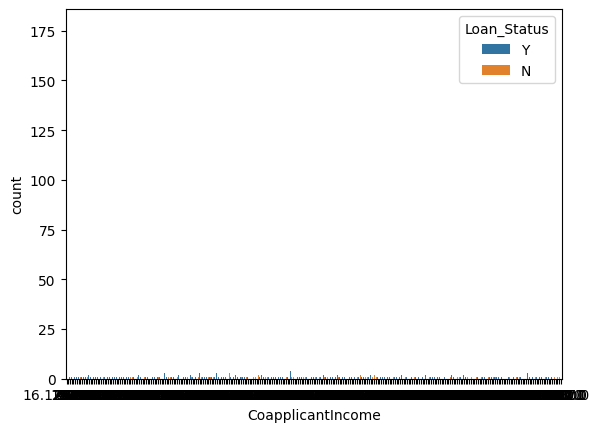

In [57]:
sns.countplot(x='CoapplicantIncome',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

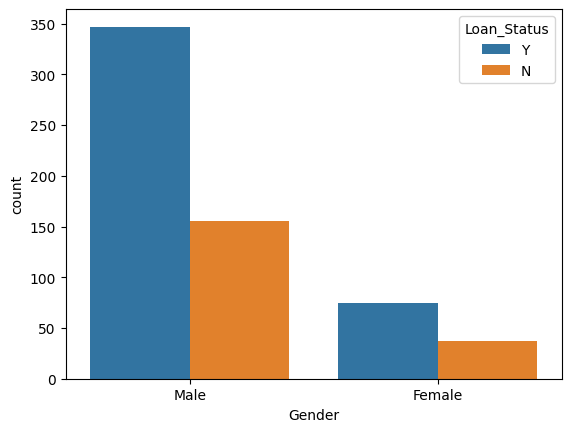

In [42]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

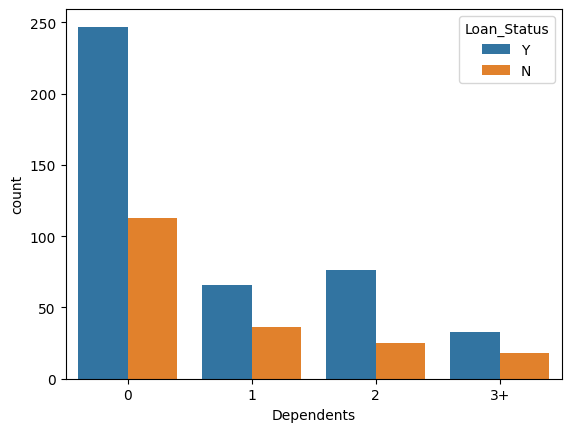

In [58]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

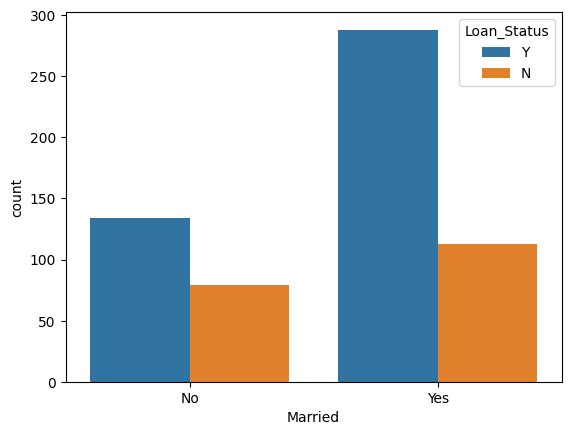

In [45]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

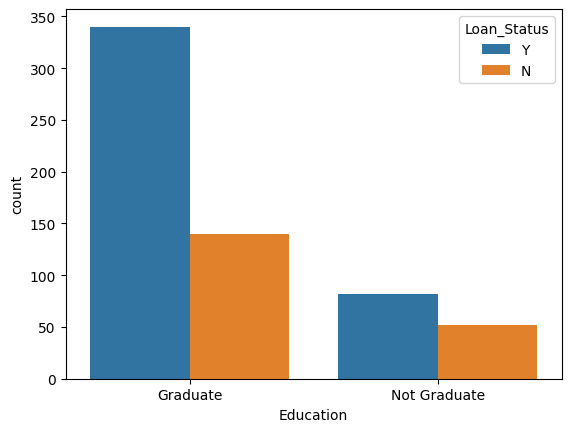

In [46]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

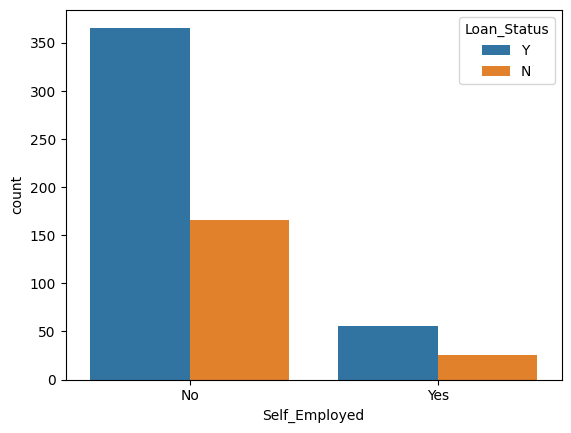

In [47]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

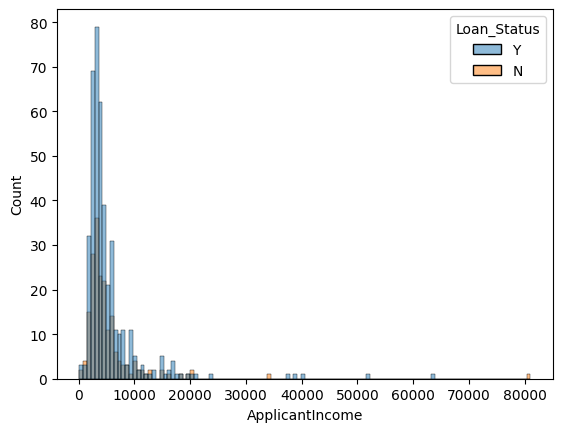

In [48]:
sns.histplot(x='ApplicantIncome',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

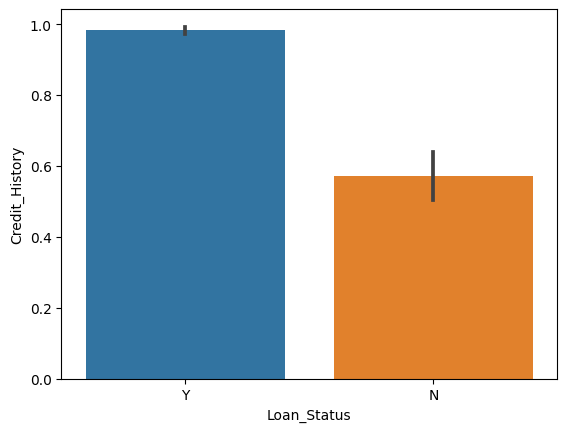

In [50]:
sns.barplot(x='Loan_Status',y='Credit_History',data=df)

<Axes: xlabel='Loan_Status', ylabel='Count'>

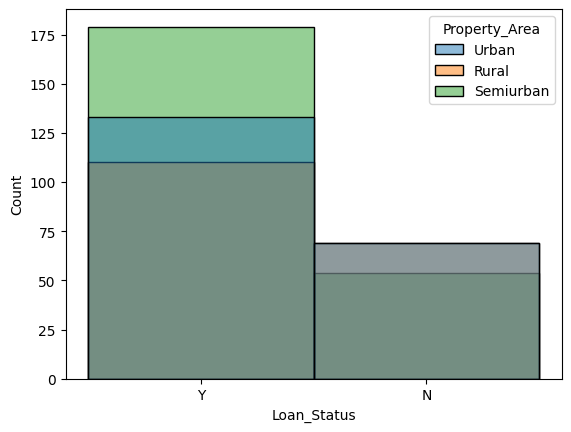

In [41]:
sns.histplot(x='Loan_Status',hue='Property_Area',multiple='layer',fill=True,color='Red',data=df)

Model Building

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [66]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

Train test split

In [67]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [68]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1]


In [69]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
350       1        1           0          0              0         0.604085   
377       1        1           0          0              0        -0.201226   
163       1        1           2          0              0        -0.225353   
609       0        0           0          0              0        -0.439124   
132       1        0           0          0              0        -0.469831   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
350          -0.528127    0.926826          0.287611        0.407763   
377          -0.528127   -0.209201          0.287611        0.407763   
163          -0.072293    0.115378          0.287611        0.407763   
609          -0.528127   -0.893136          0.287611        0.407763   
132          -0.528127   -0.904728          0.287611        0.407763   

     Property_Area  Loan_Status_Predicted  
350              1                      1  
377 